# Eliminación Gaussiana con pivoteo

In [18]:
import numpy as np
def row_echelon(M):
    """ Return Row Echelon Form of matrix A """
    A = np.copy(M)
    if (issubclass(A.dtype.type, np.integer)):
        A = A.astype(float)
    #A = M.astype(float)
    # if matrix A has no columns or rows,
    # it is already in REF, so we return itself
    r, c = A.shape
    if r == 0 or c == 0:
        return A

    # we search for non-zero element in the first column
    for i in range(len(A)):
        if A[i,0] != 0:
            break
    else:
        # if all elements in the first column is zero,
        # we perform REF on matrix from second column
        B = row_echelon(A[:,1:])
        # and then add the first zero-column back
        return np.hstack([A[:,:1], B])

    # if non-zero element happens not in the first row,
    # we switch rows
    if i > 0:
        ith_row = A[i].copy()
        A[i] = A[0]
        A[0] = ith_row

    # we divide first row by first element in it
    A[0] = A[0] / A[0,0]
    # we subtract all subsequent rows with first row (it has 1 now as first element)
    # multiplied by the corresponding element in the first column
    A[1:] -= A[0] * A[1:,0:1]

    # we perform REF on matrix from second row, from second column
    B = row_echelon(A[1:,1:])

    # we add first row and first (zero) column, and return
    return np.vstack([A[:1], np.hstack([A[1:,:1], B]) ])

1. Implementar el algoritmo de eliminación gaussiana con pivoteo para $A \in K^{n \times n}$.

Para $j = 1, \dots, n-1$:  
1. Buscar $k$, $j \le k \le n$, tal que $|a_{kj}|$ sea máximo  
2. Si $k \neq j$, intercambiar las filas $k$ y $j$  
3. Para $i = j+1, \dots, n$:  
    a. $l = \frac{a_{ij}}{a_{jj}}$  
    b. $\text{fila}_i = \text{fila}_i - l \text{fila}_j$  

**Sugerencia:** en matemática, el índice para el cual se alcanza el máximo se llama *argmax* (argumento del máximo). Por ejemplo, si $x = (1,3,7,2,-5)$,
$$
\underset{1\le i \le 5}{\mathrm{argmax}}\, x_i = 3
$$
En `numpy` existe el comando `np.argmax`

2. Utilizar el programa para resolver el sistema de ecuaciones
$$
\begin{pmatrix}
3 & 0 & -2 \\
2 & 10^{-20} & 4 \\
4 & 5 & 7
\end{pmatrix} 
\begin{pmatrix}
x_1 \\
x_2 \\
x_3
\end{pmatrix} = \begin{pmatrix}
1 \\
-1 \\
4
\end{pmatrix}
$$
y comparar con la solución de `np.linalg.solve` y la solución de resolver el sistema sin pivotear.

**Sugerencia:** para resolver el sistema luego de obtener la forma escalonada, podés implementar sustitución hacia atrás o aplicar el comando `np.linalg.solve` a la matriz escalonada, separando las matrices $A$ y $b$.

In [16]:
def resolver_matriz_ampliada(M):
    (nr,nc) = np.shape(M)   # Pattern matching
    A = M[:,:nr]  # Las primeras nr columnas
    b = M[:,nc-1]   # La última columna
    return(np.linalg.solve(A,b))

In [20]:
# Lo probamos con la matriz original
M = np.array([[3,0,-2,1], [2,10**(-20),4,-1],[4,5,7,4]])
M2 = row_echelon(M)
print(resolver_matriz_ampliada(M))

[ 0.125   1.1375 -0.3125]


### Extra
En Trefethen (página 160) se da el siguiente algoritmo para obtener la descomposición LU con pivoteo parcial. Implementarlo en Pyhton y utilizarlo para resolver el sistema del Ejercicio 2.

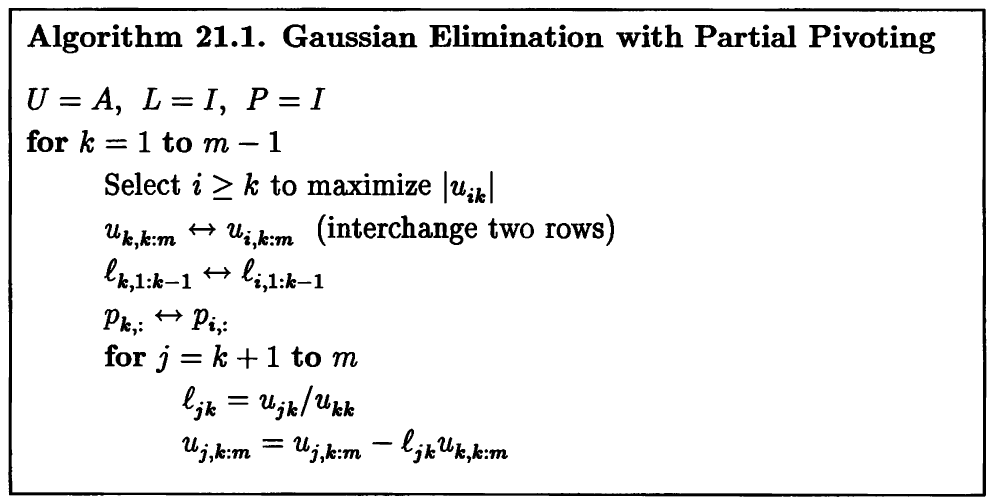